# THE SPARKS FOUNDATION

# Data Science and Bussiness Analytics Intern

Name : Jagrite Jain
    
Task : 1 (What will be the predicted score if student studies for 9.25hr day.)    

Prediction using Supervised Machine Learning : Simple Linear Regression

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
import pickle
import pyttsx3
#Load the necessary packages

In [12]:
pyttsx3.speak("Hello Everyone")

In [13]:
pyttsx3.speak("I have completed task one as Data Science and Bussiness Analytics inter under The Sparks Foundation")

In [3]:
# Show plots in jupyter notebook
%matplotlib inline

In [5]:
# Set plot style
sns.set(color_codes=True)

Load data into a dataframe
Data file are in csv format, hence we can use the built-in functions form pandas pd.read_csv(filename)


In [15]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported in the notebook")

Data imported in the notebook


In [16]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
pd.DataFrame({"Data type":data.dtypes})

,Data type
Hours,float64
Scores,int64


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's also look at the basic statistics of the data. From above we can obtain a lot of information about the dataset we are dealing with. Some key facts include:With increasing in studying hours of the students we can see increasing scores also

In [16]:
pd.DataFrame({"Missing values (%)": data.isnull().sum()/len(data.index)*100})

,Missing values (%)
Hours,0.0
Scores,0.0


In [17]:
data[data.duplicated()]

,Hours,Scores


After the checking all the missing values and duplicated values in the data.  

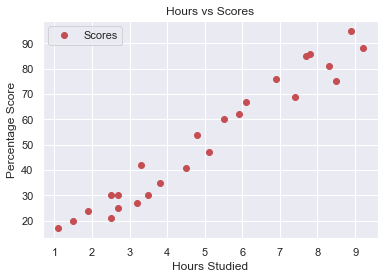

In [70]:
data.plot(x='Hours', y='Scores' ,style='ro')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

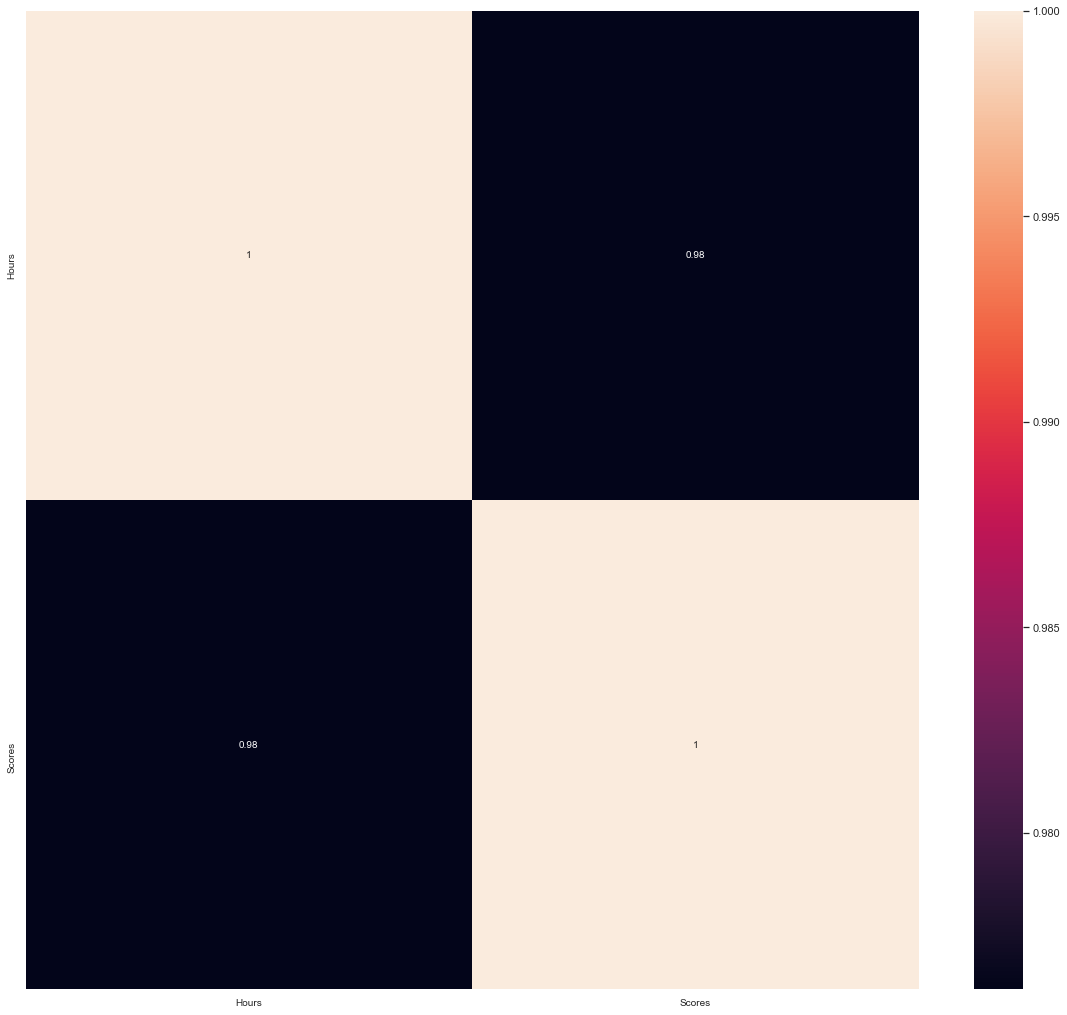

In [22]:
correlation = data.corr()
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the graph above, we can clearly see that there is a positive linear relation and higher correlation  between the number of hours studied and percentage of score.

In [24]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [26]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

We have split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() 

In [27]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

 train our algorithm.

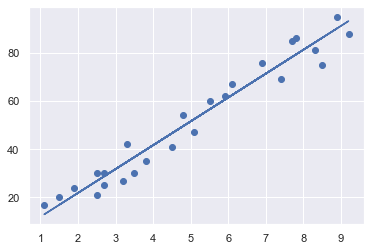

In [68]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [30]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [31]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [64]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


In [74]:
hours=float(input("Enter the number of hours you study ? "))
percentage=regressor.predict([[hours]])
print("Predicted percentage :", percentage)

Enter the number of hours you study ?9.25
Predicted percentage : [93.69173249]
